<a href="https://colab.research.google.com/github/fabarroso/MVP-ML/blob/main/mvpml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MVP -  Machine Learning
Nome: Fabio de Andrade Barroso

Matricula:4052025000158

Dataset original: https://basedosdados.org/dataset/dbd717cb-7da8-4efd-9162-951a71694541?table=a2e9f998-e2c2-49b7-858a-ae1daef46dc0

**Segurança no Estado de São Paulo - Dados estatísticos da Secretaria de Segurança Pública do Estado de São Paulo.**

O dataset contém informações sobre ocorrências policiais no estado de São Paulo, com diversas variáveis relacionadas a diferentes tipos de crimes (homicídios, furtos, roubos, estupros, etc.) por município, mês e ano.

**Organização:**
Governo de São Paulo

**Cobertura temporal:**
2002 - 2021

**1 - Objetivo**

Analisar o comportamento e a ocorrência de crimes ao longo do tempo, utilizando técnicas de Análise Exploratória de Dados (EDA), pré-processamento de dados e aprendizado de máquina para identificar padrões, prever tendências e possíveis fatores que impactam a criminalidade.

**1.1 - Escopo**

**Exploração dos dados:** Identificar e compreender a distribuição e tendências dos diferentes tipos de crimes (homicídios, roubos, furtos, etc.) ao longo do tempo.

**Pré-processamento:** Lidar com valores ausentes, formatação de dados, normalização e transformação de variáveis para melhor adequação ao modelo.

**Machine Learning:** Aplicar modelos preditivos para classificar ou prever tipos de crimes ou áreas de maior risco com base em variáveis temporais e geográficas.

**1.2 - Contexto do Problema**

A segurança pública é um tema central em muitas discussões políticas e sociais. A análise dos dados de criminalidade pode auxiliar no planejamento de políticas públicas mais eficazes e estratégias de prevenção. Com o uso de machine learning, é possível prever áreas de maior risco e padrões sazonais de crimes, ajudando as autoridades a direcionar recursos de forma mais eficiente.

**2 - Ambiente**

As bibliotecas foram escolhidas para garantir um fluxo eficiente de análise de dados e modelagem. *Pandas* e *NumPy* são usadas para manipulação e cálculo dos dados. *Matplotlib* e *Seaborn* são utilizadas para visualização e exploração gráfica. *Scikit-learn*  facilita o pré-processamento, criação de modelos, validação cruzada e avaliação de desempenho. Essas ferramentas asseguram uma análise robusta e reprodutível do dataset.

Ao carregar o dataset e realizar experimentos com o modelo, a definição da *seed*   assegura que a divisão entre treino e teste e outras etapas aleatórias, como a inicialização do modelo, sejam consistentes. Isso é crucial para garantir que as avaliações de desempenho do modelo sejam justas e reproduzíveis em diferentes execuções.

Foi utilizado pd.set_option do Pandas, evitando assim que colunas ou textos ficassem truncados.

In [ ]:
## Carga de bibliotecas utilizadas

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import random
import sys
#from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Definir o SEED para reprodutibilidade (controle de aleatoriedade)
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Ajustando as configurações para exibir todas as colunas e linhas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

# Exibição de resultados
print("Python:", sys.version.split()[0])
print("Seed global:", SEED)

Python: 3.12.11
Seed global: 42


**3 - Dados: carga, entendimento e qualidade**

O dataset foi carregado diretamente de uma URL no GitHub, utilizando pd.read_csv, com a configuração de delimitador para vírgula (,) e codificação adequada para caracteres especiais (ISO-8859-1).

In [ ]:
##Carregamento dos Dados
# URL GitHub
url = 'https://raw.githubusercontent.com/fabarroso/dados_sp_gov_ssp/main/sp_gov_ssp.csv'

# Carregamento do dataset
df = pd.read_csv(url, delimiter=',', encoding='ISO-8859-1')

A exclusão dos últimos quatro meses do último ano pode ser justificada pelo fato de que esses meses estavam completamente vazios (ou seja, não continham registros válidos). Ao remover essas linhas vazias, observamos melhora na qualidade dos dados utilizados para análise, evitando que valores ausentes ou irrelevantes distorçam os resultados.

In [ ]:
# Exibe as primeiras 10 linhas
print(df.head(10).to_string())

print("\n" + "-"*660 + "\n")

# Identificar o último ano no dataset
ultimo_ano = df['ano'].max()

# Identificar os últimos 4 meses desse último ano
meses_para_excluir = [9, 10, 11, 12]  # setembro, outubro, novembro, dezembro

# Criar um DataFrame com os dados que serão excluídos (últimos 4 meses do último ano)
df_eliminado = df[(df['ano'] == ultimo_ano) & (df['mes'].isin(meses_para_excluir))]

# Exibir as linhas eliminadas
print("Linhas Eliminadas:")
print(df_eliminado)

print("\n" + "-"*660 + "\n")

# Exibir a quantidade de linhas eliminadas
print("\nQuantidade de Linhas Eliminadas:", df_eliminado.shape[0])

# Filtrando o DataFrame para excluir os últimos 4 meses do último ano
df_filtrado = df[~((df['ano'] == ultimo_ano) & (df['mes'].isin(meses_para_excluir)))]

    ano  mes  id_municipio           regiao_ssp  homicidio_doloso  numero_de_vitimas_em_homicidio_doloso  homicidio_doloso_por_acidente_de_transito  numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito  homicidio_culposo_por_acidente_de_transito  homicidio_culposo_outros  tentativa_de_homicidio  lesao_corporal_seguida_de_morte  lesao_corporal_dolosa  lesao_corporal_culposa_por_acidente_de_transito  lesao_corporal_culposa_outras  latrocinio  numero_de_vitimas_em_latrocinio  total_de_estupro  estupro  estupro_de_vulneravel  total_de_roubo_outros  roubo_outros  roubo_de_veiculo  roubo_a_banco  roubo_de_carga  furto_outros  furto_de_veiculo
0  2002    1       3500105  Presidente Prudente               0.0                                    0.0                                        0.0                                                             0.0                                         0.0                       0.0                     0.0                              0.0       

In [ ]:
# Informações dos tipos de dados
df.info()

print("\n" + "-"*50 + "\n")

# Criar um dataframe para mostrar a estrutura de forma tabular
column_structure = pd.DataFrame({
    'Nome da Coluna': df.columns,
    'Descrição': [column.replace('_', ' ').capitalize() for column in df.columns],
    'Tipo de Dado': [df[column].dtype for column in df.columns]
})

# Exibir a estrutura do dataset de forma tabular
print (column_structure)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153876 entries, 0 to 153875
Data columns (total 27 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   ano                                                             153876 non-null  int64  
 1   mes                                                             153876 non-null  int64  
 2   id_municipio                                                    153876 non-null  int64  
 3   regiao_ssp                                                      153876 non-null  object 
 4   homicidio_doloso                                                151296 non-null  float64
 5   numero_de_vitimas_em_homicidio_doloso                           151296 non-null  float64
 6   homicidio_doloso_por_acidente_de_transito                       143700 non-null  float64
 7   numero_de_vitimas_em_homicidio_doloso_

**3.1 Análise exploratória (EDA)**

In [ ]:
# Análise de valores ausentes
missing_data = df.isnull().sum()
missing_percentage = (missing_data / df.shape[0]) * 100
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})

# Exibindo valores ausentes por coluna
missing_info = missing_info[missing_info['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
print(missing_info)

                                                                Missing Values  Percentage
estupro                                                                 117888   76.612337
roubo_outros                                                            117888   76.612337
estupro_de_vulneravel                                                   110196   71.613507
lesao_corporal_seguida_de_morte                                          48648   31.615067
homicidio_doloso_por_acidente_de_transito                                10176    6.613117
numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito           10176    6.613117
homicidio_doloso                                                          2580    1.676675
tentativa_de_homicidio                                                    2580    1.676675
homicidio_culposo_outros                                                  2580    1.676675
homicidio_culposo_por_acidente_de_transito                                2580    1.676675

In [ ]:
# Análise estatística descritiva das colunas numéricas
descriptive_stats = df.describe()
print(descriptive_stats)

                 ano            mes  id_municipio  homicidio_doloso  numero_de_vitimas_em_homicidio_doloso  homicidio_doloso_por_acidente_de_transito  numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito  homicidio_culposo_por_acidente_de_transito  homicidio_culposo_outros  tentativa_de_homicidio  lesao_corporal_seguida_de_morte  lesao_corporal_dolosa  lesao_corporal_culposa_por_acidente_de_transito  lesao_corporal_culposa_outras     latrocinio  numero_de_vitimas_em_latrocinio  total_de_estupro       estupro  estupro_de_vulneravel  total_de_roubo_outros  roubo_outros  roubo_de_veiculo  roubo_a_banco  roubo_de_carga   furto_outros  furto_de_veiculo
count  153876.000000  153876.000000  1.538760e+05     151296.000000                          151296.000000                              143700.000000                                                   143700.000000                               151296.000000             151296.000000           151296.000000                    105228.

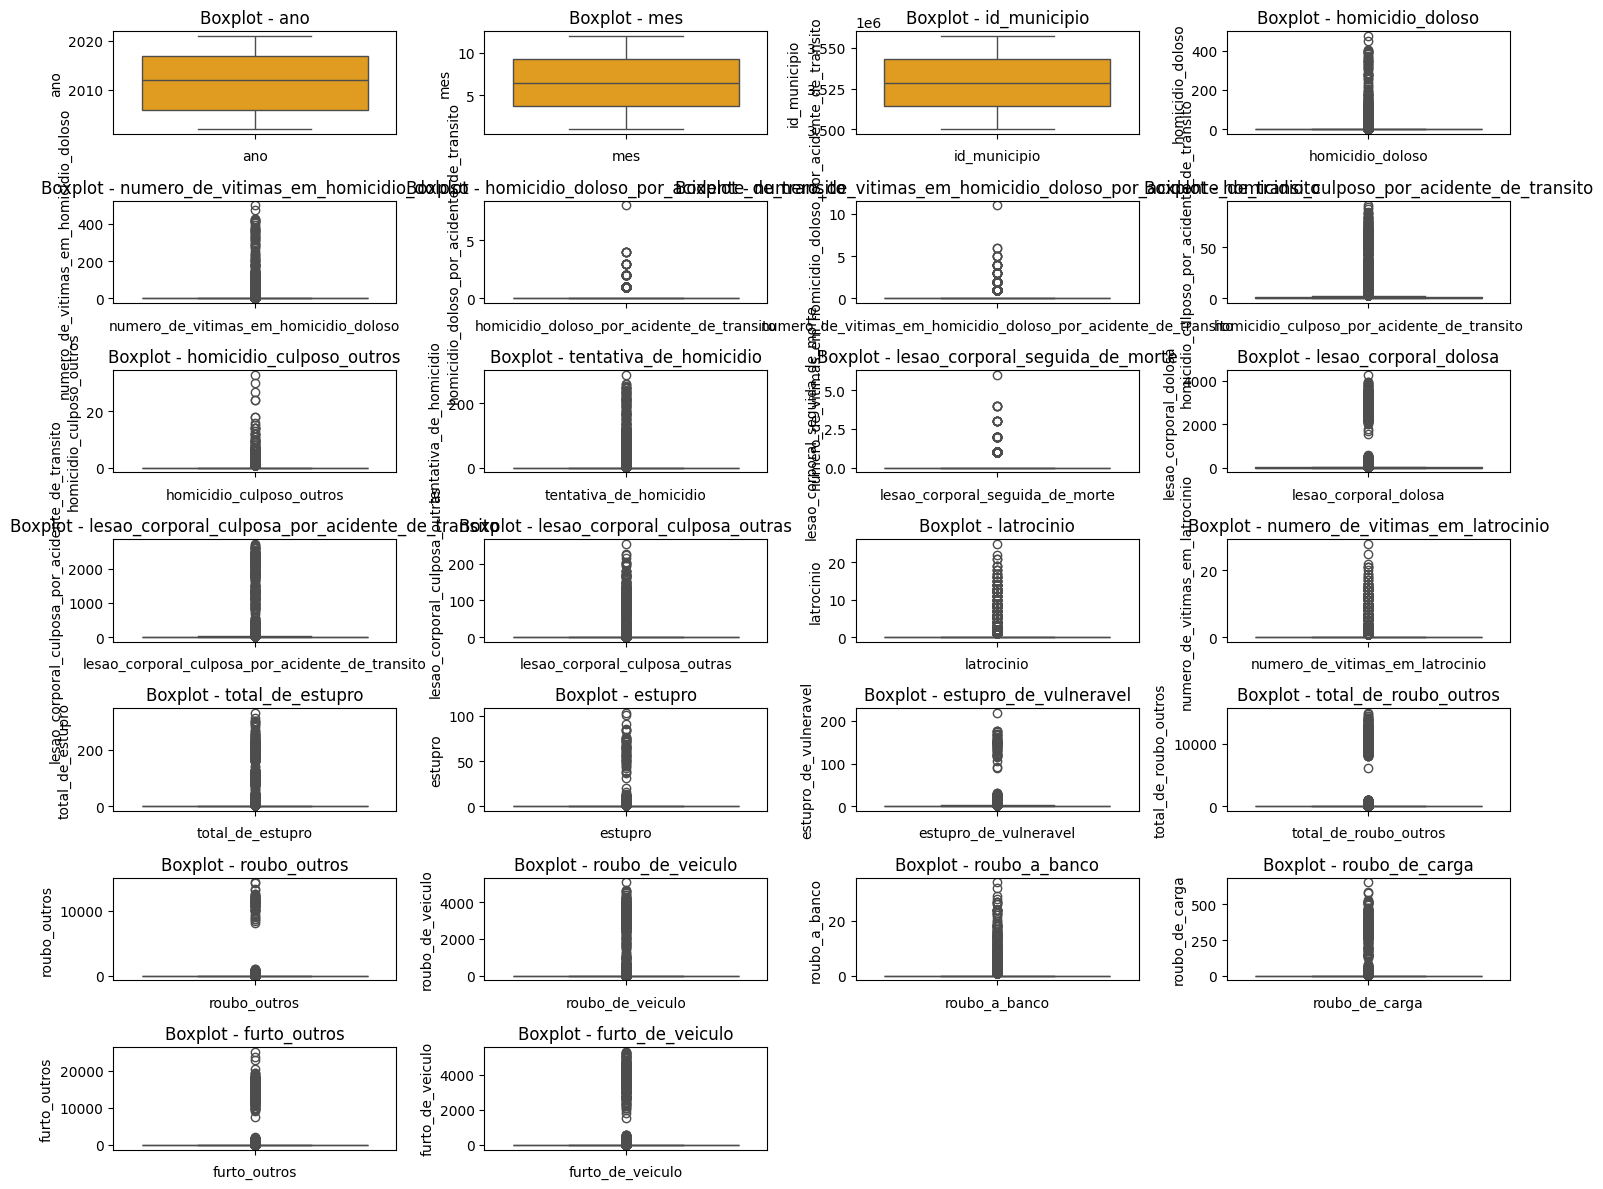

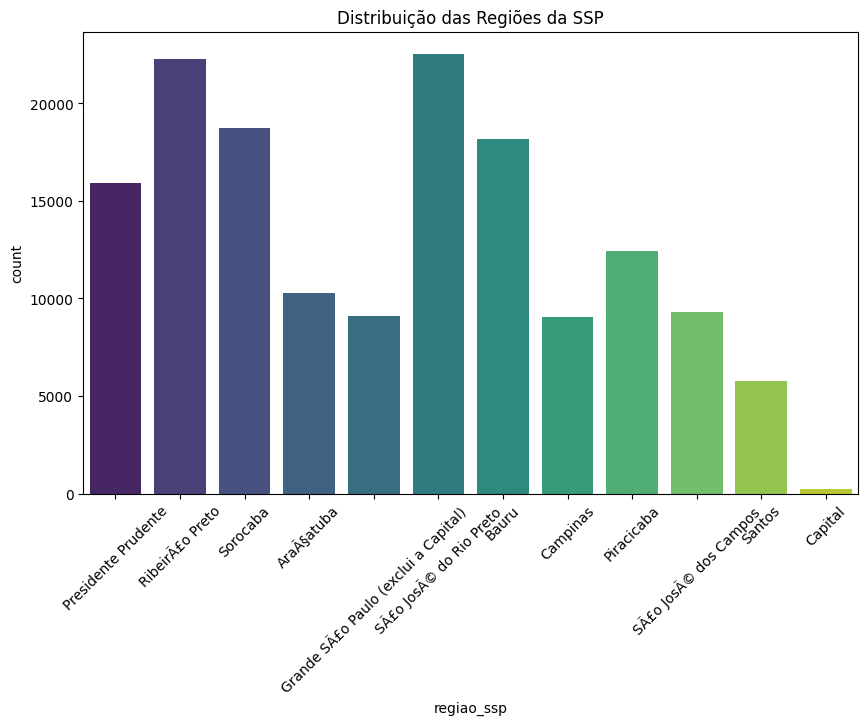

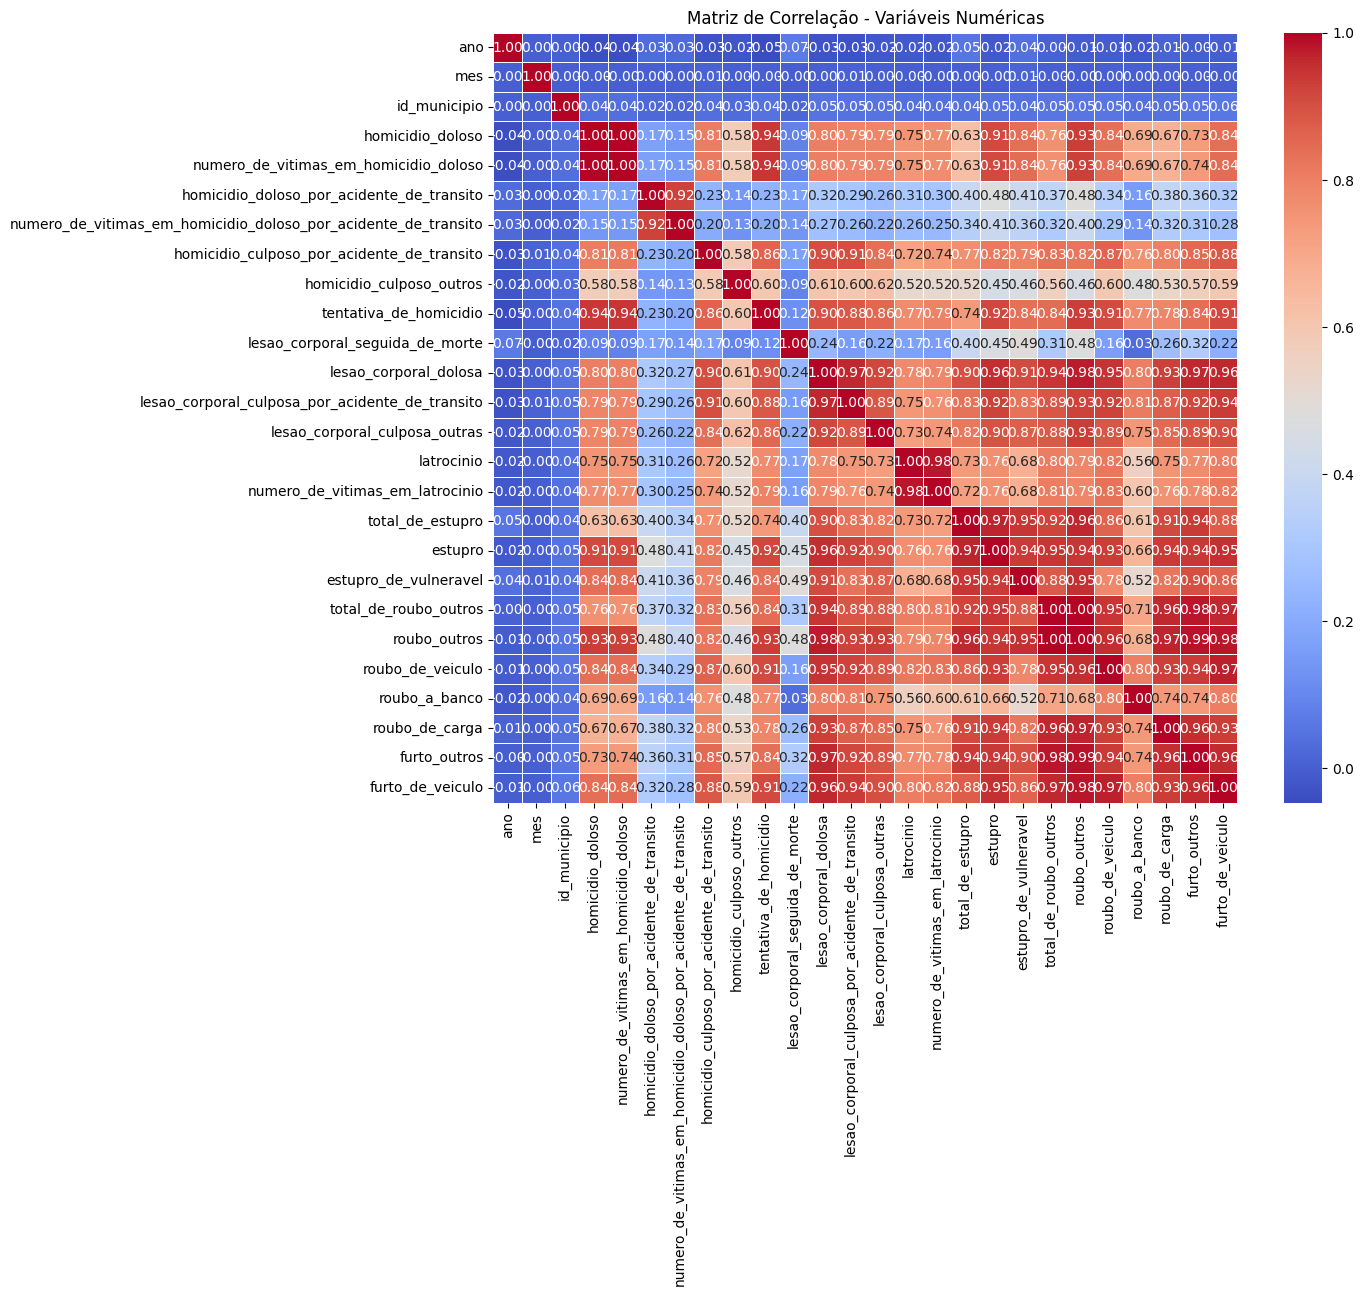

In [ ]:
# Visualização de Outliers - Boxplot para variáveis numéricas
plt.figure(figsize=(15, 12))
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
n_cols = 4  # Número de colunas na grade
n_rows = (len(numerical_cols) // n_cols) + (1 if len(numerical_cols) % n_cols > 0 else 0)  # Calcula o número de linhas necessárias

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # Ajusta o número de linhas e colunas dinamicamente
    sns.boxplot(df[col], color='orange')
    plt.title(f'Boxplot - {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# Análise de variáveis categóricas: Distribuição de regiões da SSP
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='regiao_ssp', palette='viridis')
plt.title('Distribuição das Regiões da SSP')
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap (incluindo apenas variáveis numéricas)
numerical_df = df.select_dtypes(include=['float64', 'int64'])  # Seleciona apenas colunas numéricas
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.show()

**4 - Pré Processamento**

In [ ]:
# 1. Tratar valores ausentes: imputação com a média para variáveis numéricas
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Selecionar as colunas numéricas para imputação
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Imputar os valores ausentes nas colunas numéricas
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# 2. Normalização dos dados: usar o StandardScaler para normalizar as variáveis numéricas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Normalizar as colunas numéricas
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 3. Tratamento de variáveis categóricas com OneHotEncoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Variáveis categóricas para one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns

# Criar um transformador para codificar variáveis categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

# Aplica a transformação para as variáveis de treino
df_transformed = preprocessor.fit_transform(df)

# 4. Remover colunas irrelevantes ou altamente correlacionadas
# Verificar correlações entre variáveis numéricas
correlation_matrix = df[numerical_cols].corr()
high_correlation = correlation_matrix[correlation_matrix > 0.95]
drop_cols = high_correlation.columns.tolist()  # Colunas altamente correlacionadas
drop_cols.remove('homicidio_doloso')  # Manter a variável alvo

# Remover colunas com alta correlação
df_cleaned = df.drop(columns=drop_cols)

# Exibir as primeiras linhas após o pré-processamento completo
print(df_cleaned.head())

            regiao_ssp  homicidio_doloso
0  Presidente Prudente         -0.099828
1  Presidente Prudente         -0.099828
2  Presidente Prudente         -0.099828
3  Presidente Prudente         -0.099828
4  Presidente Prudente         -0.099828


**5 - Divisão em Conjuntos de Treinamento e Teste**

In [ ]:
# Separar as variáveis independentes (X) e dependentes (y)
X = df_cleaned.drop(columns=['homicidio_doloso'])  # Exemplo: previsão de homicídios
y = df_cleaned['homicidio_doloso']

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

**6 - Construção do Modelo com Validação Cruzada**

In [ ]:
# 3. Random Forest com validação cruzada
model = RandomForestClassifier(random_state=SEED)

# Validar com cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
print(f"Validação Cruzada - Acurácia média: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py", line 360, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'SÃ£o JosÃ© dos Campos'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py", line 360, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Piracicaba'


**7 - Otimização de Hiperparâmetros com GridSearchCV**

In [ ]:
# 1. Ampliar o GridSearchCV com mais parâmetros
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2']  # Mais opções de max_features
}

# 2. GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Treinando o modelo com GridSearchCV
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_

# Exibir melhores parâmetros
print(f"Melhores parâmetros: {grid_search.best_params_}")

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


ValueError: 
All the 4320 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
690 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.

--------------------------------------------------------------------------------
750 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

--------------------------------------------------------------------------------
576 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py", line 360, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'SÃ£o JosÃ© dos Campos'

--------------------------------------------------------------------------------
2304 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py", line 360, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Piracicaba'


8 - Avaliação do Modelo Otimizado

In [ ]:
# Previsões com o modelo otimizado
y_pred_best = best_model.predict(X_test)

# Avaliar o modelo otimizado
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Acurácia (modelo otimizado): {accuracy_best * 100:.2f}%')

# Avaliar com múltiplas métricas
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

# Curva ROC e AUC
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

***Machine Learning - Regressão***

In [ ]:
# ==============================================================
# Projeto: Regressão Explicativa - SSP SP (Versão Final)
# ==============================================================

# 1. Ambiente e Reprodutibilidade
!pip install xgboost lightgbm --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

SEED = 42
np.random.seed(SEED)

# ==============================================================
# 2. Carregar dataset
print("Carregando dataset...")
url = 'https://raw.githubusercontent.com/fabarroso/dados_sp_gov_ssp/main/sp_gov_ssp.csv'
df = pd.read_csv(url)
print("Shape original:", df.shape)
display(df.head())

# ===============================================================
# 3. Remover últimos 4 meses do último ano
ultimo_ano = df['ano'].max()
meses_para_excluir = [9,10,11,12]
linhas_remover = df[(df['ano']==ultimo_ano)&(df['mes'].isin(meses_para_excluir))]
print(f"\nNúmero de linhas a serem removidas: {linhas_remover.shape[0]}")
display(linhas_remover)

df = df.drop(linhas_remover.index).reset_index(drop=True)
print("Shape após remoção últimos 4 meses:", df.shape)

# ===============================================================
# 4. Função para Winsorização de outliers
def winsorize_outliers(df, num_cols):
    df_w = df.copy()
    for col in num_cols:
        Q1 = df_w[col].quantile(0.25)
        Q3 = df_w[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        df_w[col] = np.where(df_w[col] < lower, lower, df_w[col])
        df_w[col] = np.where(df_w[col] > upper, upper, df_w[col])
    return df_w

# ===============================================================
# 5. EDA completo
def eda_regression(df, target):
    print("\n=== Estatísticas Descritivas ===")
    display(df.describe().T)

    # Histograma do target
    plt.figure(figsize=(6,3))
    plt.hist(df[target], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histograma - {target}')
    plt.xlabel(target)
    plt.ylabel('Frequência')
    plt.show()

    # Seleção de variáveis numéricas
    num_cols = df.select_dtypes(include=np.number).columns.tolist()
    num_cols.remove(target)

    # Top 5 variáveis para gráficos
    top_num_cols = num_cols[:5]
    for col in top_num_cols:
        plt.figure(figsize=(6,3))
        plt.hist(df[col].dropna(), bins=20, color='lightgreen', edgecolor='black')
        plt.title(f'Histograma - {col}')
        plt.show()

        plt.figure(figsize=(6,3))
        sns.violinplot(x=df[col], color='lightblue')
        plt.title(f'Violin Plot - {col}')
        plt.show()

        # Boxplot
        plt.figure(figsize=(6,3))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot - {col}')
        plt.show()

    # Heatmap de correlação (Top 10 numéricas mais correlacionadas com o target)
    corr_matrix = df[num_cols + [target]].corr()
    top_corr_cols = corr_matrix[target].abs().sort_values(ascending=False).iloc[1:11].index.tolist()
    plt.figure(figsize=(10,6))
    sns.heatmap(df[top_corr_cols + [target]].corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Matriz de Correlação - Top 10 numéricas')
    plt.show()

    # Valores ausentes
    missing = (df.isna().sum()/len(df)*100).sort_values(ascending=False)
    print("\n=== Valores Ausentes (%) ===")
    display(missing[missing>0])

    return df, num_cols

df, num_cols = eda_regression(df, 'homicidio_doloso')

# Aplicando Winsorização para outliers
df = winsorize_outliers(df, num_cols)

# ===============================================================
# 6. Definição de features e target
target = 'homicidio_doloso'
X = df.drop(columns=[target])
y = df[target]

# ===============================================================
# 7. Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
print("Treino:", X_train.shape, "Teste:", X_test.shape)

# ===============================================================
# 8. Pré-processamento com imputação, normalização e one-hot
cat_cols = X_train.select_dtypes(include='object').columns.tolist()

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])

# ===============================================================
# 9. Modelos candidatos
models_params = {
    "LinearRegression": {
        "model": LinearRegression(),
        "params": {}
    },
    "RandomForest": {
        "model": RandomForestRegressor(random_state=SEED),
        "params": {"model__n_estimators": [50, 100], "model__max_depth": [5, 10]}
    },
    "GradientBoosting": {
        "model": GradientBoostingRegressor(random_state=SEED),
        "params": {"model__n_estimators": [50, 100], "model__learning_rate": [0.05, 0.1], "model__max_depth": [3, 5]}
    },
    "XGBoost": {
        "model": XGBRegressor(random_state=SEED, verbosity=0),
        "params": {"model__n_estimators": [50, 100], "model__learning_rate": [0.05, 0.1], "model__max_depth": [3,5]}
    },
    "LightGBM": {
        "model": LGBMRegressor(random_state=SEED, verbose=-1),
        "params": {"model__n_estimators": [50, 100], "model__learning_rate": [0.05, 0.1], "model__max_depth": [5]}
    }
}

# ===============================================================
# 10. Treino, RandomizedSearchCV e avaliação
best_models = {}
metrics = []

for name, mp in models_params.items():
    print(f"\n=== Treino e Otimização {name} ===")
    pipe = Pipeline([("prep", preprocessor), ("model", mp["model"])])

    if mp["params"]:
        search = RandomizedSearchCV(pipe, mp["params"], n_iter=4, cv=3, scoring='r2', random_state=SEED, n_jobs=-1)
        search.fit(X_train, y_train)
        best_models[name] = search.best_estimator_
        print(f"Melhor R² CV: {search.best_score_:.3f}")
        print(f"Melhores parâmetros: {search.best_params_}")
    else:
        pipe.fit(X_train, y_train)
        best_models[name] = pipe
        score = cross_val_score(pipe, X_train, y_train, cv=3, scoring='r2').mean()
        print(f"R² CV: {score:.3f}")

    # Previsão e métricas
    y_pred = best_models[name].predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics.append({"Model": name, "RMSE": rmse, "MAE": mae, "R2": r2})

# ===============================================================
# 11. Comparativo final
metrics_df = pd.DataFrame(metrics).sort_values("R2", ascending=False)
display(metrics_df)

metrics_melt = metrics_df.melt(id_vars='Model', value_vars=['RMSE','MAE','R2'], var_name='Metric', value_name='Value')
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Value', hue='Metric', data=metrics_melt)
plt.title("Comparativo de Performance dos Modelos")
plt.xticks(rotation=45)
plt.show()

# ===============================================================
# 12. Melhor modelo e avaliação final
best_name = metrics_df.iloc[0]['Model']
best_model = best_models[best_name]
print(f"Melhor modelo selecionado: {best_name}")

y_pred = best_model.predict(X_test)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Real")
plt.ylabel("Predito")
plt.title(f"Real vs Predito - {best_name}")
plt.show()

# Feature Importance (se aplicável)
try:
    model_obj = best_model.named_steps["model"]
    if hasattr(model_obj, "feature_importances_"):
        cat_features = best_model.named_steps["prep"].named_transformers_["cat"].named_steps["onehot"].get_feature_names_out(cat_cols)
        feature_names = num_cols + list(cat_features)
        importances = model_obj.feature_importances_
        feat_imp = pd.DataFrame({"feature": feature_names, "importance": importances}).sort_values("importance", ascending=False).head(20)
        plt.figure(figsize=(10,6))
        sns.barplot(x="importance", y="feature", data=feat_imp)
        plt.title(f"Top 20 Features - {best_name}")
        plt.show()
except:
    print("Não foi possível calcular feature importance para este modelo.")

# ===============================================================
# 13. Learning Curves
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=3, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1,1.0,5))
plt.figure(figsize=(7,5))
plt.plot(train_sizes, train_scores.mean(axis=1), "o-", label="Train R²")
plt.plot(train_sizes, test_scores.mean(axis=1), "o-", label="CV R²")
plt.xlabel("Amostra de Treino")
plt.ylabel("R²")
plt.title(f"Learning Curve - {best_name}")
plt.legend()
plt.show()